<a href="https://colab.research.google.com/github/Neena-A/Wat-Pneu/blob/main/C_Watermarking_Encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
# import opencv
from google.colab.patches import cv2_imshow
import cv2
 
# Load the input image
image = cv2.imread('/content/IM-0005-0001.jpeg')
cv2_imshow(image)
cv2.waitKey(0)

image = cv2.resize(image,(1000,1000))
print(image.shape)
# Use the cvtColor() function to grayscale the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
cv2_imshow(gray_image)
print(gray_image.shape)

In [ ]:
gray_image


array([[20, 40, 39, ..., 30, 31, 17],
       [21, 39, 39, ..., 30, 32, 18],
       [21, 38, 39, ..., 29, 30, 17],
       ...,
       [16, 30, 28, ..., 35, 35, 18],
       [15, 29, 26, ..., 37, 35, 17],
       [16, 31, 28, ..., 40, 33, 17]], dtype=uint8)

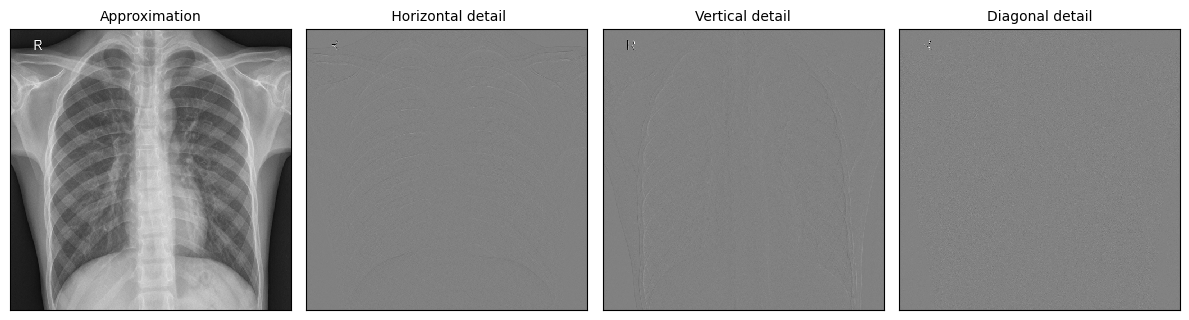

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = gray_image

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 13))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

code to do DWT

In [ ]:
def split(LL, nrows, ncols):

    r, h = LL.shape
    return(LL.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))
A,B,C,D=split(LL,251,251)

In [ ]:
from numpy import array
from scipy.linalg import svd
s=0
temp = []
U, s, VT = svd(A)

temp.append(s[0])
U, s, VT = svd(B)
temp.append(s[0])
U, s, VT = svd(C)
temp.append(s[0])
U, s, VT = svd(D)
temp.append(s[0])

SVD


In [ ]:
temp

In [ ]:
M=[]
for x in range(3):
  if temp[x]>=temp[x+1]:
    M.append(1)
  else:
    M.append(0)  
M

[0, 1, 0]

Binary Image

In [ ]:
from google.colab import files
text = files.upload()

Saving Input.txt to Input.txt


In [ ]:
with open('Input.txt', 'r') as file:
    text1 = file.read()


In [ ]:
binary_str = ''.join(format(ord(char), '08b') for char in text1)


In [ ]:
binary_str

'0110100001111001011001000110010101110010001000000111001001100001011100110110000101101011000010100110101101100101011011100110000101110011001000000111011001100001011100100110011101101000011001010111001101100101000010100110111001100001011101100111100101100001001000000110011101100101011011110111001001100111011001010000101001101110011001010110010101101110011000010010000001101101011000010111001001111001001000000110000101101100011001010111100000001010'

In [ ]:
N=[]
for c in binary_str:
  N.append(ord(c)-48)



In [ ]:
len(N)

448

In [ ]:
H=[]
for i in range(len(N)):
  if N[i]==M[i%3]:
    H.append(0)
  else:
    H.append(1)  


In [ ]:
H

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [ ]:
num = len(H)
binary_str = format(num, 'b')
while(len(binary_str)<10):
  binary_str= '0'+binary_str



In [ ]:
binary_str

'0111000000'

In [ ]:
K=""
for c in H:
  K+=chr(c+48)
K= binary_str+K




In [ ]:
K

'01110000000010000101011101111101100010110001010110101100100011101101000101111000010010100001001111100110000010001001000001111111000010100001010111101100100011111101000101111000000010111001001100111101110011101001000001100110000010011101000101111001000011000001000101101100100010111001000001111111010011101101000011111101110100001101001010111101110010110001001010111100110110100101001001111100110011101101011101101100100010100001001000111101110011000100101110'

In [ ]:
import math

width = int(math.sqrt(len(K)))
height = int(len(K) / width)
height+=1
from PIL import Image

img = Image.new('1', (width, height))
for i, bit in enumerate(K):
    x = i % width
    y = i // width
    img.putpixel((x, y), int(bit) * 255)




In [ ]:
img.save(f"Output.jpg")

In [ ]:
img